## Supervised Learning Algorithms Part 2

#### This script follows the structure below

## 1.Importing libraries
## 2.Data Wrangling
## 3. Supervised Learning Algorithm - Decision Tree
### 3.1 Supervised Learning Algorithm - Decision Tree - Confusion Matrix
## 4. Supervised Learning Algorithm - Artifical Neural Netwrok (ANNs)
### 4.1 Comparison between scaled and unscaled data
### 4.2 Run the ANN Model

# 1. Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

In [5]:
# Creating a path for importing the climate data set

path = r'/Users/daniel/Desktop/Ordner/Data Analyst/Data Analytics Course/Data Specialization/Achievement 1/Data Sets'

In [6]:
# Import the data set

df_scale = pd.read_csv(os.path.join(path, '[DATASET]_scaled.csv'),index_col = False)

df_answer = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'),index_col = False)

# 2. Data Wrangling

In [8]:
# Show all the columns in the data set
pd.set_option('display.max_columns', 200)

# Show all the rows in the data set
pd.set_option('display.max_rows', None)

#### Dataset Weather

In [10]:
# Check for correct import 

df_scale.head()

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,

In [11]:
# Check for data frame shape

df_scale.shape

(22950, 169)

In [12]:
# Check for missing values

df_scale.isnull().sum()

Unnamed: 0                     0
BASEL_cloud_cover              0
BASEL_wind_speed               0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_snow_depth               0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BELGRADE_cloud_cover           0
BELGRADE_humidity              0
BELGRADE_pressure              0
BELGRADE_global_radiation      0
BELGRADE_precipitation         0
BELGRADE_sunshine              0
BELGRADE_temp_mean             0
BELGRADE_temp_min              0
BELGRADE_temp_max              0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_min              0
BUDAPEST_temp_max              0
DEBILT_clo

In [13]:
# Check for duplicate values

duplicate_value = df_scale.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [14]:
# Check the basic statistic values
df_scale.describe()

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
count,22950.000000,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,22950.000000,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.2

#### Dataset Answers

In [16]:
# Check for correct import 

df_answer.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Check for data frame shape

df_answer.shape

(22950, 16)

In [18]:
# Check for missing values

df_answer.isnull().sum()

DATE                           0
BASEL_pleasant_weather         0
BELGRADE_pleasant_weather      0
BUDAPEST_pleasant_weather      0
DEBILT_pleasant_weather        0
DUSSELDORF_pleasant_weather    0
HEATHROW_pleasant_weather      0
KASSEL_pleasant_weather        0
LJUBLJANA_pleasant_weather     0
MAASTRICHT_pleasant_weather    0
MADRID_pleasant_weather        0
MUNCHENB_pleasant_weather      0
OSLO_pleasant_weather          0
SONNBLICK_pleasant_weather     0
STOCKHOLM_pleasant_weather     0
VALENTIA_pleasant_weather      0
dtype: int64

In [19]:
# Check for duplicate values

duplicate_value = df_answer.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [20]:
# Check the basic statistic values
df_answer.describe()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
count,2.295000e+04,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.0,22950.000000,22950.000000
mean,1.990984e+07,0.246797,0.348235,0.323791,0.194292,0.214989,0.216078,0.164444,0.277821,0.207669,0.446492,0.207712,0.155948,0.0,0.169673,0.051155
std,1.813833e+05,0.431157,0.476421,0.467931,0.395663,0.410824,0.411577,0.370686,0.447935,0.405647,0.497140,0.405679,0.362814,0.0,0.375354,0.220318
min,1.960010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.975092e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.991060e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.007021e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,2.022103e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [21]:
# Drop Columns from the original without enough pertinent data

df_scale_drop = df_scale.drop(columns=[col for col in df_scale.columns if col.startswith(("GDANSK", "TOURS", "ROMA"))])

In [22]:
# Check on the new dataframe

df_scale_drop.shape

(22950, 148)

In [23]:
# Create a subset from the weather data

df_weather = df_scale_drop[['BASEL_temp_mean',
                           'BASEL_temp_min',
                           'BASEL_temp_max',
                           'BELGRADE_temp_mean',
                           'BELGRADE_temp_min',
                           'BELGRADE_temp_max',
                           'BUDAPEST_temp_mean',
                           'BUDAPEST_temp_min',
                           'BUDAPEST_temp_max',
                           'DEBILT_temp_mean',
                           'DEBILT_temp_min',
                           'DEBILT_temp_max',
                           'DUSSELDORF_temp_mean',
                           'DUSSELDORF_temp_min',
                           'DUSSELDORF_temp_max',
                           'HEATHROW_temp_mean',
                           'HEATHROW_temp_min',
                           'HEATHROW_temp_max',
                           'KASSEL_temp_mean',
                           'KASSEL_temp_min',
                           'KASSEL_temp_max',
                           'LJUBLJANA_temp_mean',
                           'LJUBLJANA_temp_min',
                           'LJUBLJANA_temp_max',
                           'MAASTRICHT_temp_mean',
                           'MAASTRICHT_temp_min',
                           'MAASTRICHT_temp_max',
                           'MADRID_temp_mean',
                           'MADRID_temp_min',
                           'MADRID_temp_max',
                           'MUNCHENB_temp_mean',
                           'MUNCHENB_temp_min',
                           'MUNCHENB_temp_max',
                           'OSLO_temp_mean',
                           'OSLO_temp_min',
                           'OSLO_temp_max',
                           'SONNBLICK_temp_mean',
                           'SONNBLICK_temp_min',
                           'SONNBLICK_temp_max',
                           'STOCKHOLM_temp_mean',
                           'STOCKHOLM_temp_min',
                           'STOCKHOLM_temp_max',
                           'VALENTIA_temp_mean',
                           'VALENTIA_temp_min',
                           'VALENTIA_temp_max']].copy()

In [24]:
df_weather.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,-1.136839,-0.114356,0.263326,-0.411047,-0.105836,0.060555,-0.410423,-0.106469,0.393470,-1.038492,-0.182904,-0.251893,-0.466503,-1.370824,-1.125110,-1.578385,-0.097084,0.382899,-0.387967,-0.988280,-0.877723,-1.044732,-0.265742,-0.505735,-0.350849,-0.186575,0.094958,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,-1.341204,-0.367511,0.090631,-0.781002,-0.370915,0.125463,-0.473486,-0.892676,-0.639866,-0.687774,-0.212437,0.231491,-0.504162,-1.043881,-1.043446,-1.056415,-0.232112,0.216034,-0.542607,-0.691740,-0.411866,-0.882444,-0.353714,-0.076441,-0.372683,-0.368598,-0.033545,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,-1.116403,-0.509912,-0.220221,-0.561770,-0.532908,0.044328,-0.713127,-0.490837,-0.226532,-0.443796,-0.389635,0.098144,-0.642248,-0.741156,-0.744013,-0.972900,-0.487164,-0.117697,-0.542607,-0.853490,-0.567152,-1.044732,-0.403983,-0.104138,-0.612852,-0.550620,-0.316251,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,-1.208367,-0.525734,-0.392916,-0.534366,-0.577088,-0.491160,-0.851866,-0.316124,-0.113804,-0.947000,-0.493001,-0.035203,-0.830547,-0.910682,-0.730403,-0.899824,-0.472161,-0.534861,-0.529720,-0.624345,-0.862194,-0.430357,-0.642763,-0.214923,-0.896689,-0.417137,-0.341951,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,-1.116403,-0.320045,-0.600150,-0.383643,-0.444548,-0.069260,-0.473486,-0.403481,0.299530,-1.206227,-0.552067,-0.285230,-0.893313,-0.862246,-0.812066,-1.129491,-0.307127,-0.618294,-0.387967,-0.381721,-0.287638,-0.441949,-0.906678,-1.073511,-0.831188,-0.332193,-0.020694,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186


In [25]:
# Drop the date column from the answer set for creating a y-set

df_answer_new = df_answer.drop(['DATE'], axis=1)

In [26]:
df_answer_new.shape

(22950, 15)

# 3. Supervised Learning Algorithm - Decision Tree

In [28]:
#Create an 'X' matrix
X = df_weather
y = df_answer_new

In [29]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [30]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


[Text(0.3357853258139466, 0.9838709677419355, 'x[14] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07063207872994848, 0.9516129032258065, 'x[29] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.01984420525167793, 0.9193548387096774, 'x[5] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0]\n[7558.0, 0.0]\n[7414.0, 144.0]\n[7524.0, 34.0]\n[7558.0

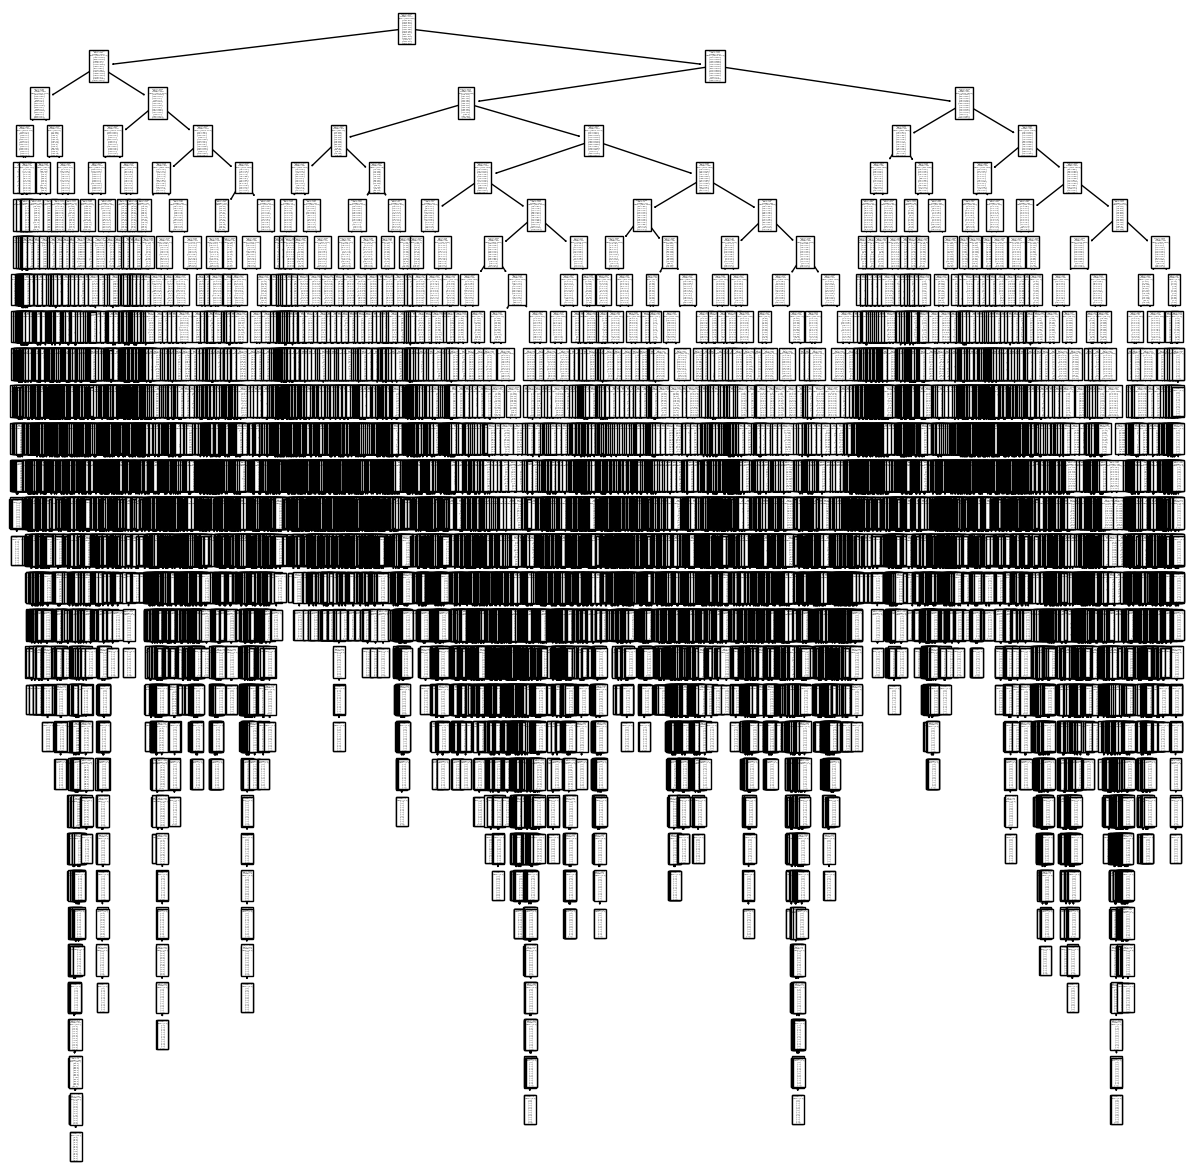

In [32]:
# Train Decision Tree Classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)

# Predict on test set
y_pred = weather_dt.predict(X_test)

# Plot the tree with max_depth for better readability
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

__Comment:__ 
- Yes, the decision tree likely needs to be pruned. Since the visual representation of the tree is unreadable due to the dataset's size, this suggests that the tree has grown too complex, possibly leading to overfitting. Pruning can help by:

#### 1️⃣ Reducing Complexity – It removes unnecessary branches, making the tree more interpretable.

#### 2️⃣ Improving Generalization – A deeply grown tree may fit the training data too closely, capturing noise rather than meaningful patterns.

#### 3️⃣ Enhancing Readability – A pruned tree is easier to visualize and understand, making it more useful for decision-making.

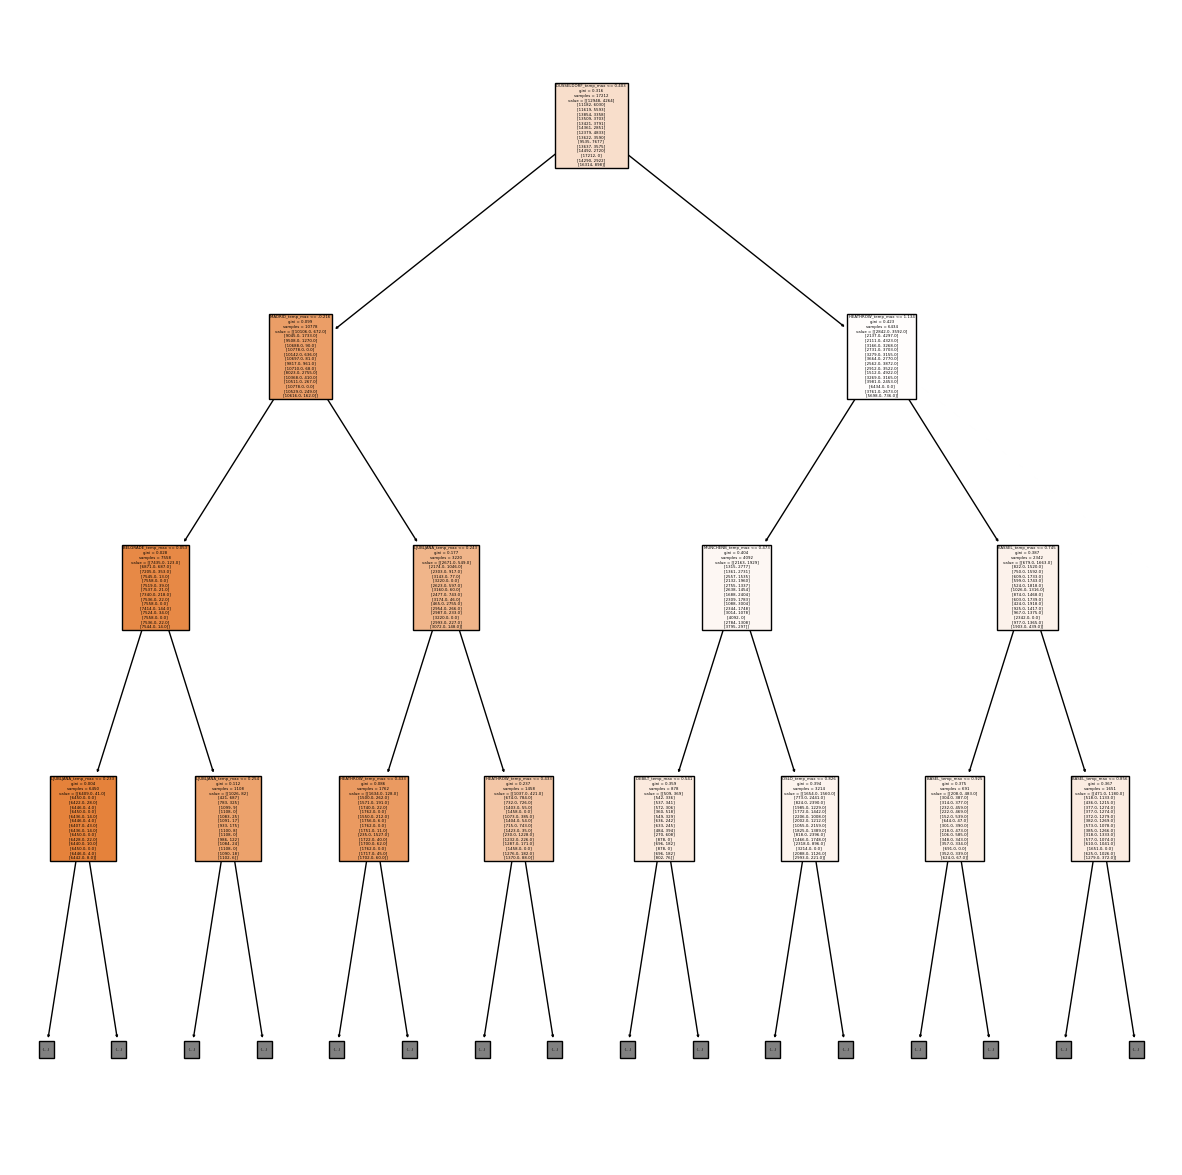

In [34]:
# Visual Improvement
# Plot the tree with limited depth
plt.figure(figsize=(15, 15))
plot_tree(weather_dt, max_depth=3, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])  
plt.show()

## 3.1 Supervised Learning Algorithm - Decision Tree - Confusion Matrix

In [36]:
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [37]:
#What is the training accuracy score? Using the cross validation method

print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4608411855080077


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


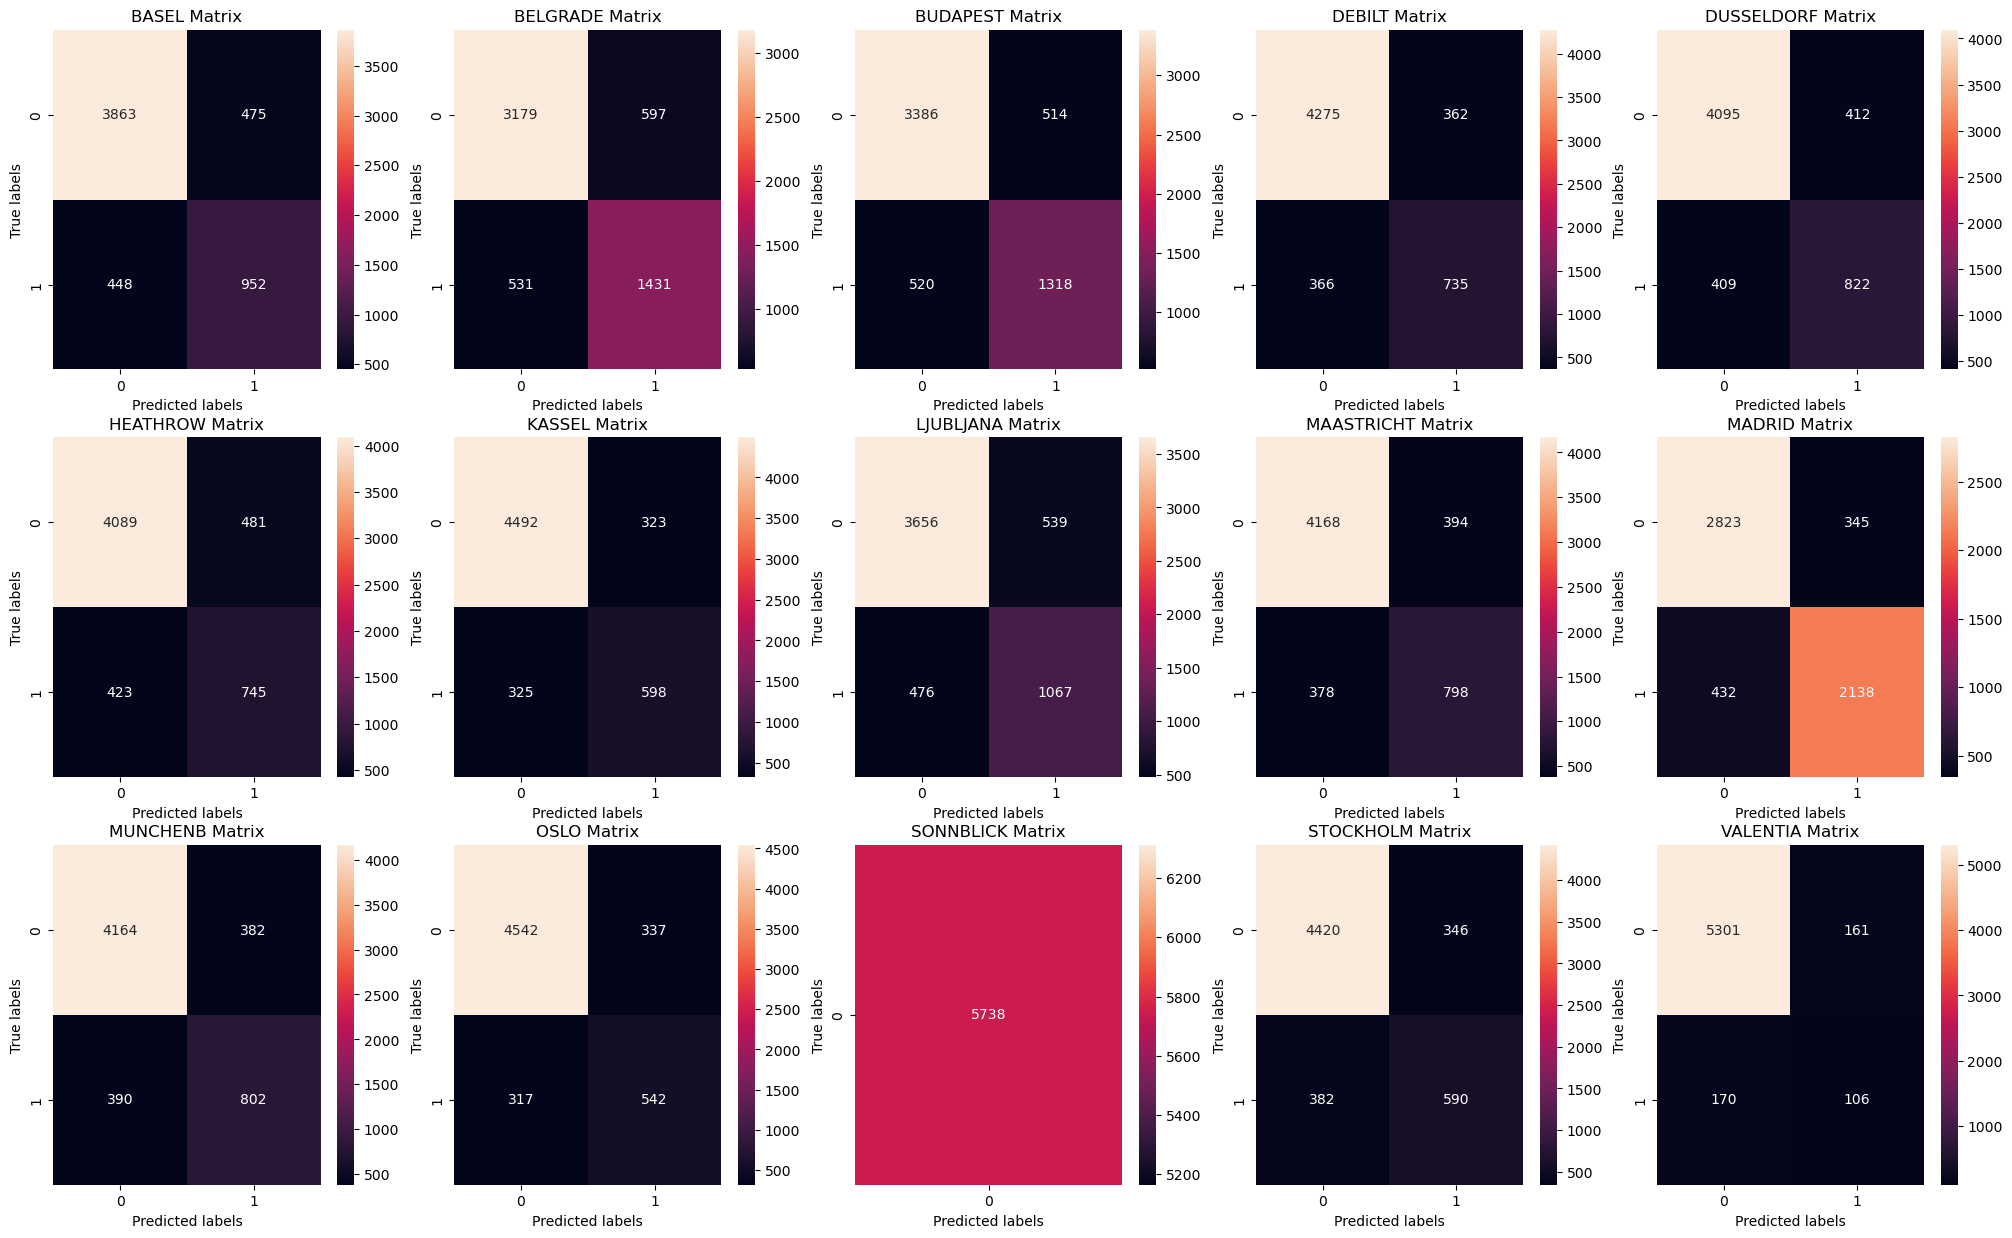

In [38]:
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']  
count = 0

for i in range(3):
    for j in range(5):
        if count >= len(locations):  # Prevent index out of range
            break

        name = locations[count]
        y_true = y_test.loc[:, name + key]
        y_pred_col = y_pred[:, count]

        # Check which labels are present in y_true
        unique_labels = set(y_true.unique())

        # Only include labels that exist in y_true to prevent ValueError
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute confusion matrix safely
        cm = confusion_matrix(y_true, y_pred_col, labels=valid_labels if valid_labels else None)

        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])  

        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')

        # Set tick labels only if valid_labels contains more than one class
        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

# 4. Supervised Learning Algorithm - Artifical Neural Netwrok (ANNs)

## 4.1 Comparison between scaled and unscaled data

In [41]:
#Import original data to create a comparison between scaled an unscaled data.
df_org = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'),index_col = False)

In [42]:
#Prepare Original Data Frame for comparison
# Drop Columns from the original without enough pertinent data

df_org_drop = df_org.drop(columns=[col for col in df_scale.columns if col.startswith(("GDANSK", "TOURS", "ROMA"))])

In [43]:
# Check on the new dataframe

df_org_drop.shape

(22950, 149)

In [44]:
# Create a subset from the weather data

df_weather_2 = df_org_drop[['BASEL_temp_mean',
                           'BASEL_temp_min',
                           'BASEL_temp_max',
                           'BELGRADE_temp_mean',
                           'BELGRADE_temp_min',
                           'BELGRADE_temp_max',
                           'BUDAPEST_temp_mean',
                           'BUDAPEST_temp_min',
                           'BUDAPEST_temp_max',
                           'DEBILT_temp_mean',
                           'DEBILT_temp_min',
                           'DEBILT_temp_max',
                           'DUSSELDORF_temp_mean',
                           'DUSSELDORF_temp_min',
                           'DUSSELDORF_temp_max',
                           'HEATHROW_temp_mean',
                           'HEATHROW_temp_min',
                           'HEATHROW_temp_max',
                           'KASSEL_temp_mean',
                           'KASSEL_temp_min',
                           'KASSEL_temp_max',
                           'LJUBLJANA_temp_mean',
                           'LJUBLJANA_temp_min',
                           'LJUBLJANA_temp_max',
                           'MAASTRICHT_temp_mean',
                           'MAASTRICHT_temp_min',
                           'MAASTRICHT_temp_max',
                           'MADRID_temp_mean',
                           'MADRID_temp_min',
                           'MADRID_temp_max',
                           'MUNCHENB_temp_mean',
                           'MUNCHENB_temp_min',
                           'MUNCHENB_temp_max',
                           'OSLO_temp_mean',
                           'OSLO_temp_min',
                           'OSLO_temp_max',
                           'SONNBLICK_temp_mean',
                           'SONNBLICK_temp_min',
                           'SONNBLICK_temp_max',
                           'STOCKHOLM_temp_mean',
                           'STOCKHOLM_temp_min',
                           'STOCKHOLM_temp_max',
                           'VALENTIA_temp_mean',
                           'VALENTIA_temp_min',
                           'VALENTIA_temp_max']].copy()

In [45]:
#Create an 'X' matrix
X_2 = df_weather_2
y = df_answer_new

In [46]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [47]:
#Split data into training and testing sets.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, random_state=42)

In [48]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [49]:
X_train_2[:10]

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,20.4,13.6,26.9,22.5,16.2,28.6,22.5,18.6,27.1,16.3,7.5,21.8,18.8,9.9,24.0,15.8,12.5,20.3,17.1,10.2,21.6,19.2,14.2,26.8,17.7,11.1,23.0,24.8,19.0,30.5,19.1,12.6,25.6,10.5,6.2,16.5,2.3,0.8,3.8,8.5,5.0,11.9,15.6,13.7,17.6
20472,-1.8,-3.2,-0.5,-3.6,-6.0,0.1,-3.3,-7.2,-0.2,-2.5,-8.0,0.7,-3.6,-6.3,-1.2,1.3,-2.7,7.0,9.1,5.4,13.1,-4.4,-8.2,-1.3,-3.8,-8.0,0.4,5.8,2.7,8.8,-4.8,-7.8,-1.5,-11.2,-13.8,-8.2,-17.4,-19.2,-15.6,-6.9,-9.4,-4.6,10.7,7.9,13.5
18269,-1.8,-6.0,0.7,3.2,1.6,6.7,-0.4,-1.3,1.0,-4.9,-10.0,-2.1,-5.4,-11.9,-2.6,-2.8,-5.7,0.8,-6.2,-10.2,-4.3,0.6,-0.6,1.2,-6.1,-11.0,-3.1,2.1,0.6,3.6,-2.4,-3.9,0.5,-14.4,-19.0,-11.7,-14.1,-15.5,-12.7,-8.3,-13.3,-5.5,1.0,-3.9,5.9
7713,-1.4,-3.8,2.1,0.7,0.3,2.5,1.5,-0.2,4.0,0.2,-4.2,3.1,-0.7,-3.1,3.4,2.4,-1.5,5.7,-2.9,-5.2,0.3,-0.4,-1.8,2.2,-1.0,-4.5,3.1,2.3,-0.4,5.0,-4.2,-7.1,-2.5,-6.5,-9.7,-2.9,-20.9,-22.4,-19.4,-2.2,-5.2,-1.5,6.8,5.5,9.6
21958,6.1,1.8,13.5,6.7,1.7,11.7,6.2,2.6,10.8,5.7,3.1,8.7,5.0,2.3,7.3,7.2,4.0,12.5,9.1,5.4,13.1,6.6,-1.3,11.1,5.9,2.7,8.6,11.0,7.8,14.3,5.2,1.1,9.8,0.6,-2.9,5.3,-14.7,-16.6,-12.7,1.0,-0.6,3.5,10.7,7.9,13.5
11464,18.3,10.6,24.1,18.7,14.7,24.0,18.7,14.5,22.0,12.1,6.0,16.5,13.6,10.3,20.1,16.6,12.0,18.2,13.4,9.9,19.7,19.1,9.2,26.2,13.9,6.8,19.1,18.8,11.2,26.5,18.3,10.4,22.4,11.4,9.5,16.3,-2.6,-3.9,-1.3,10.0,7.7,15.6,13.1,9.0,16.9
3984,3.7,-0.5,6.3,4.4,3.4,5.0,4.7,4.3,5.4,5.2,2.5,8.2,6.9,4.8,8.9,10.4,7.3,13.4,2.8,1.6,3.4,1.4,-0.8,2.6,7.0,1.8,12.4,13.2,11.6,14.8,-2.0,-5.4,0.7,-2.1,-4.2,-0.2,-2.6,-4.1,-1.0,1.1,0.0,2.6,10.9,9.3,12.5
4752,-3.9,-7.4,-1.6,0.5,0.0,1.7,2.1,1.3,2.8,2.3,-0.9,4.5,2.3,1.4,4.4,8.8,7.1,6.3,0.0,-1.0,1.7,0.8,-0.2,1.6,3.2,1.1,4.4,6.5,3.0,10.0,-2.1,-5.1,-0.4,-0.4,-1.8,3.5,-10.3,-12.3,-8.2,1.3,-1.2,3.0,10.5,9.7,11.4
11092,15.7,11.2,22.4,21.3,14.1,26.9,20.6,15.7,25.7,13.5,4.6,20.6,16.0,7.3,22.2,17.3,12.5,21.0,13.8,4.1,19.6,18.3,10.6,26.5,14.8,5.4,21.5,19.2,12.8,25.6,14.5,12.2,20.0,12.8,6.2,19.3,-0.7,-2.2,0.8,11.9,8.6,15.8,12.6,9.5,15.8
21377,18.8,9.9,26.0,23.6,20.1,27.2,21.6,16.9,27.2,19.0,13.6,24.6,20.4,14.7,27.3,19.4,13.7,27.5,9.1,5.4,13.1,19.6,14.4,24.6,20.3,15.6,26.9,26.8,21.0,32.7,18.2,12.1,23.3,21.5,17.5,29.3,4.4,-0.7,9.5,20.0,14.2,26.4,10.7,7.9,13.5


In [50]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train_2)

#Scaling the X data
X_train_sc = scaler.transform(X_train_2)
X_test_sc = scaler.transform(X_test_2)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [51]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train_2.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test_2.columns)

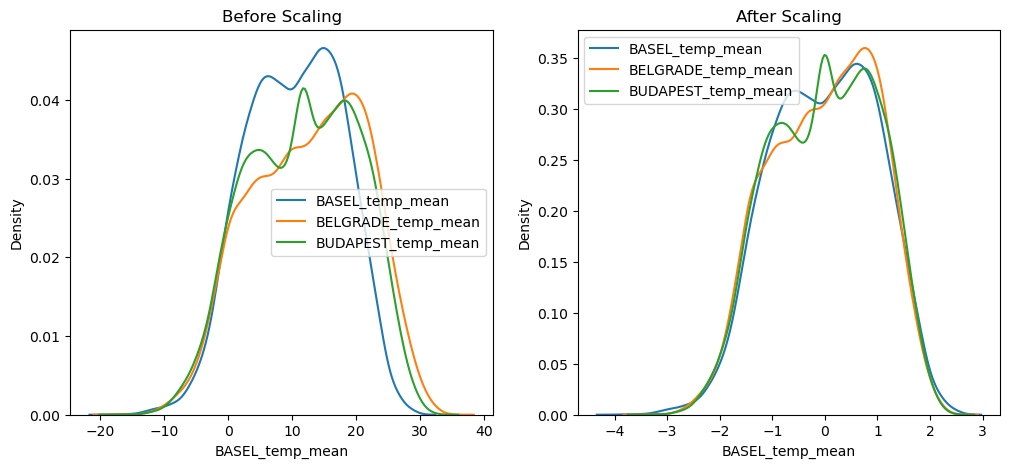

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))  # Increased figure size for better readability

ax1.set_title('Before Scaling')
selected_cols = ['BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean']  # Reduced columns for clarity
for col in selected_cols:
    sns.kdeplot(X_train_2[col], ax=ax1, label=col)  # Added labels for better identification

ax2.set_title('After Scaling')
for col in selected_cols:
    sns.kdeplot(X_train_df[col], ax=ax2, label=col)  

ax1.legend()
ax2.legend()
plt.show()


__Interpretation__

Scaling the data makes a difference, due to the much higher density in the data and the values are weighted more equally by the network.

## 4.2 Run the ANN Model

### First Run

In [56]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [57]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4643853125726238
0.46758452422446845


#### Multi-Staion Matrix Training Set

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


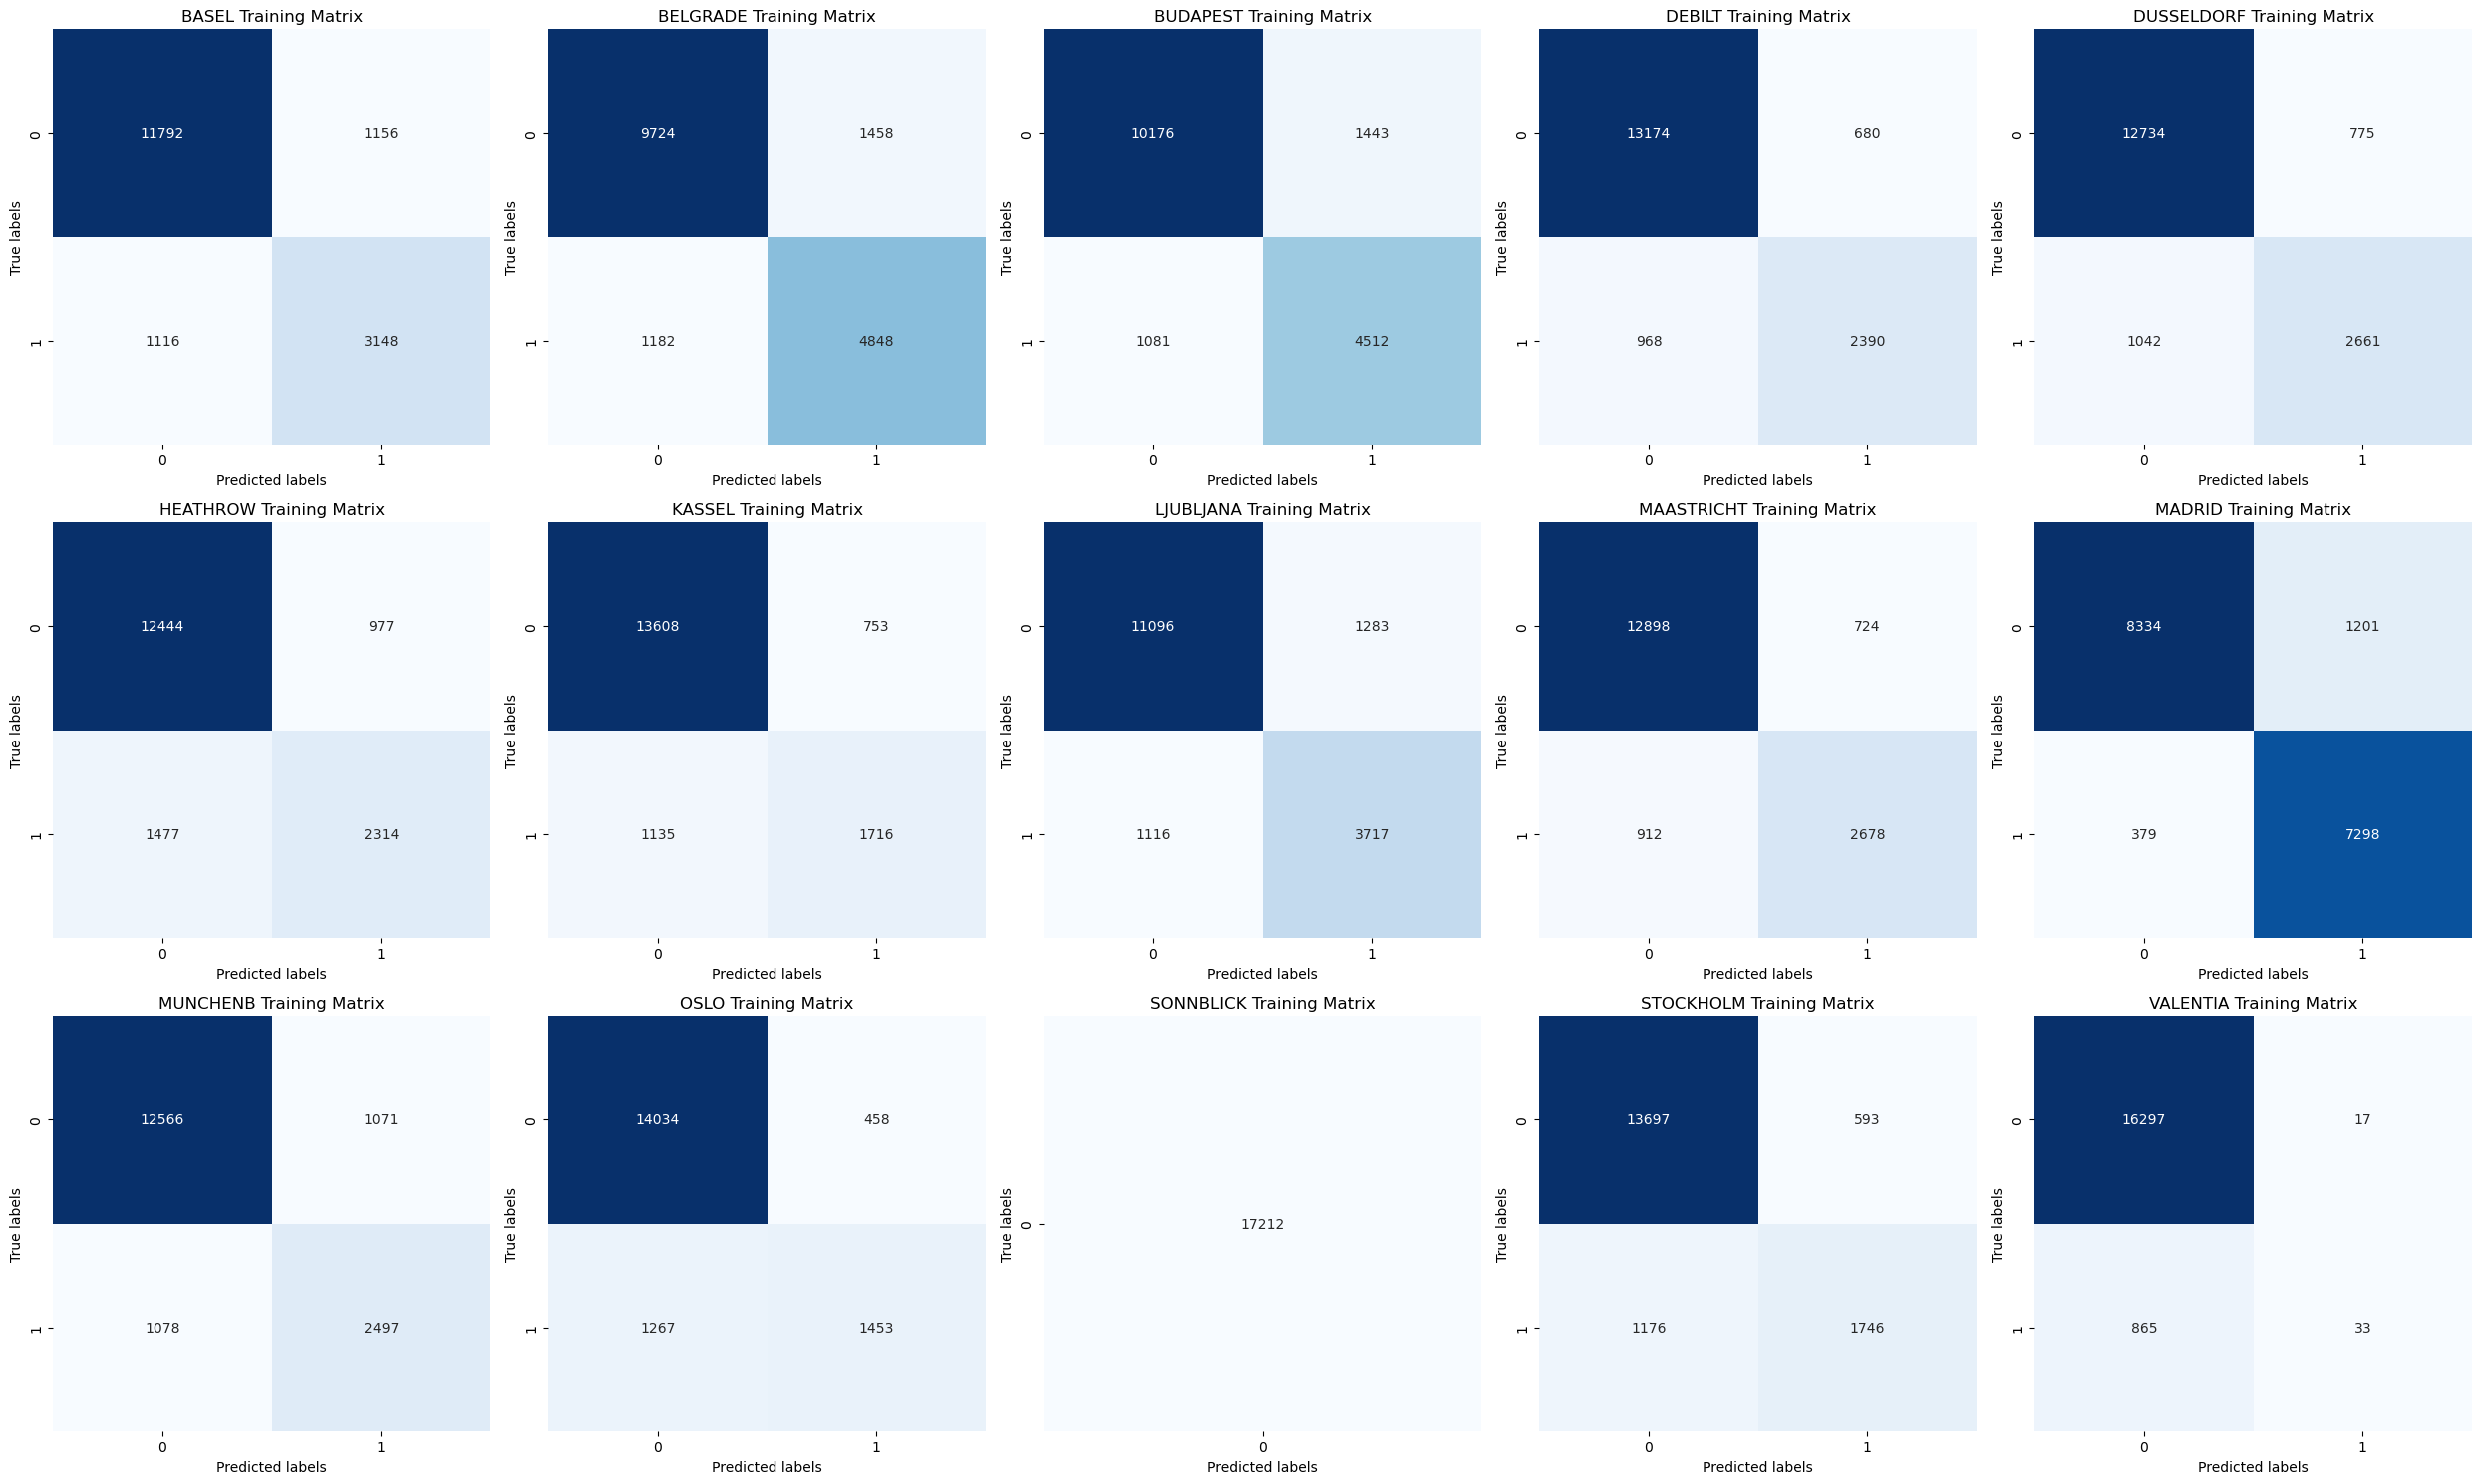

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: Assuming 'locations' contains the station names, 'y_train' and 'y_pred' are NumPy arrays

# Ensure y_train and y_pred are NumPy arrays
y_train = np.array(y_train)
y_pred = np.array(y_pred)

# Set up the number of rows and columns for subplots (based on number of stations)
rows = 3  # adjust this based on your data
cols = 5  # adjust this based on your data

# Initialize the figure for plotting the confusion matrices
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
count = 0

# Loop through each station and create a confusion matrix for each
for i in range(rows):
    for j in range(cols):
        if count >= len(locations):  # Prevent index out of range
            break
        
        # Get station name
        name = locations[count]

        # Extract the true and predicted labels for this station
        y_true = y_train[:, count] if y_train.ndim > 1 else y_train
        y_pred_col = y_pred[:, count] if y_pred.ndim > 1 else y_pred

        # Get unique labels for this station
        unique_labels = np.unique(y_true)
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred_col, labels=valid_labels if valid_labels else None)

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues", cbar=False)

        # Set labels and title for each subplot
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(f'{name} Training Matrix')

        # Set tick labels if valid labels are available
        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Multi-Staion Matrix Test Set

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


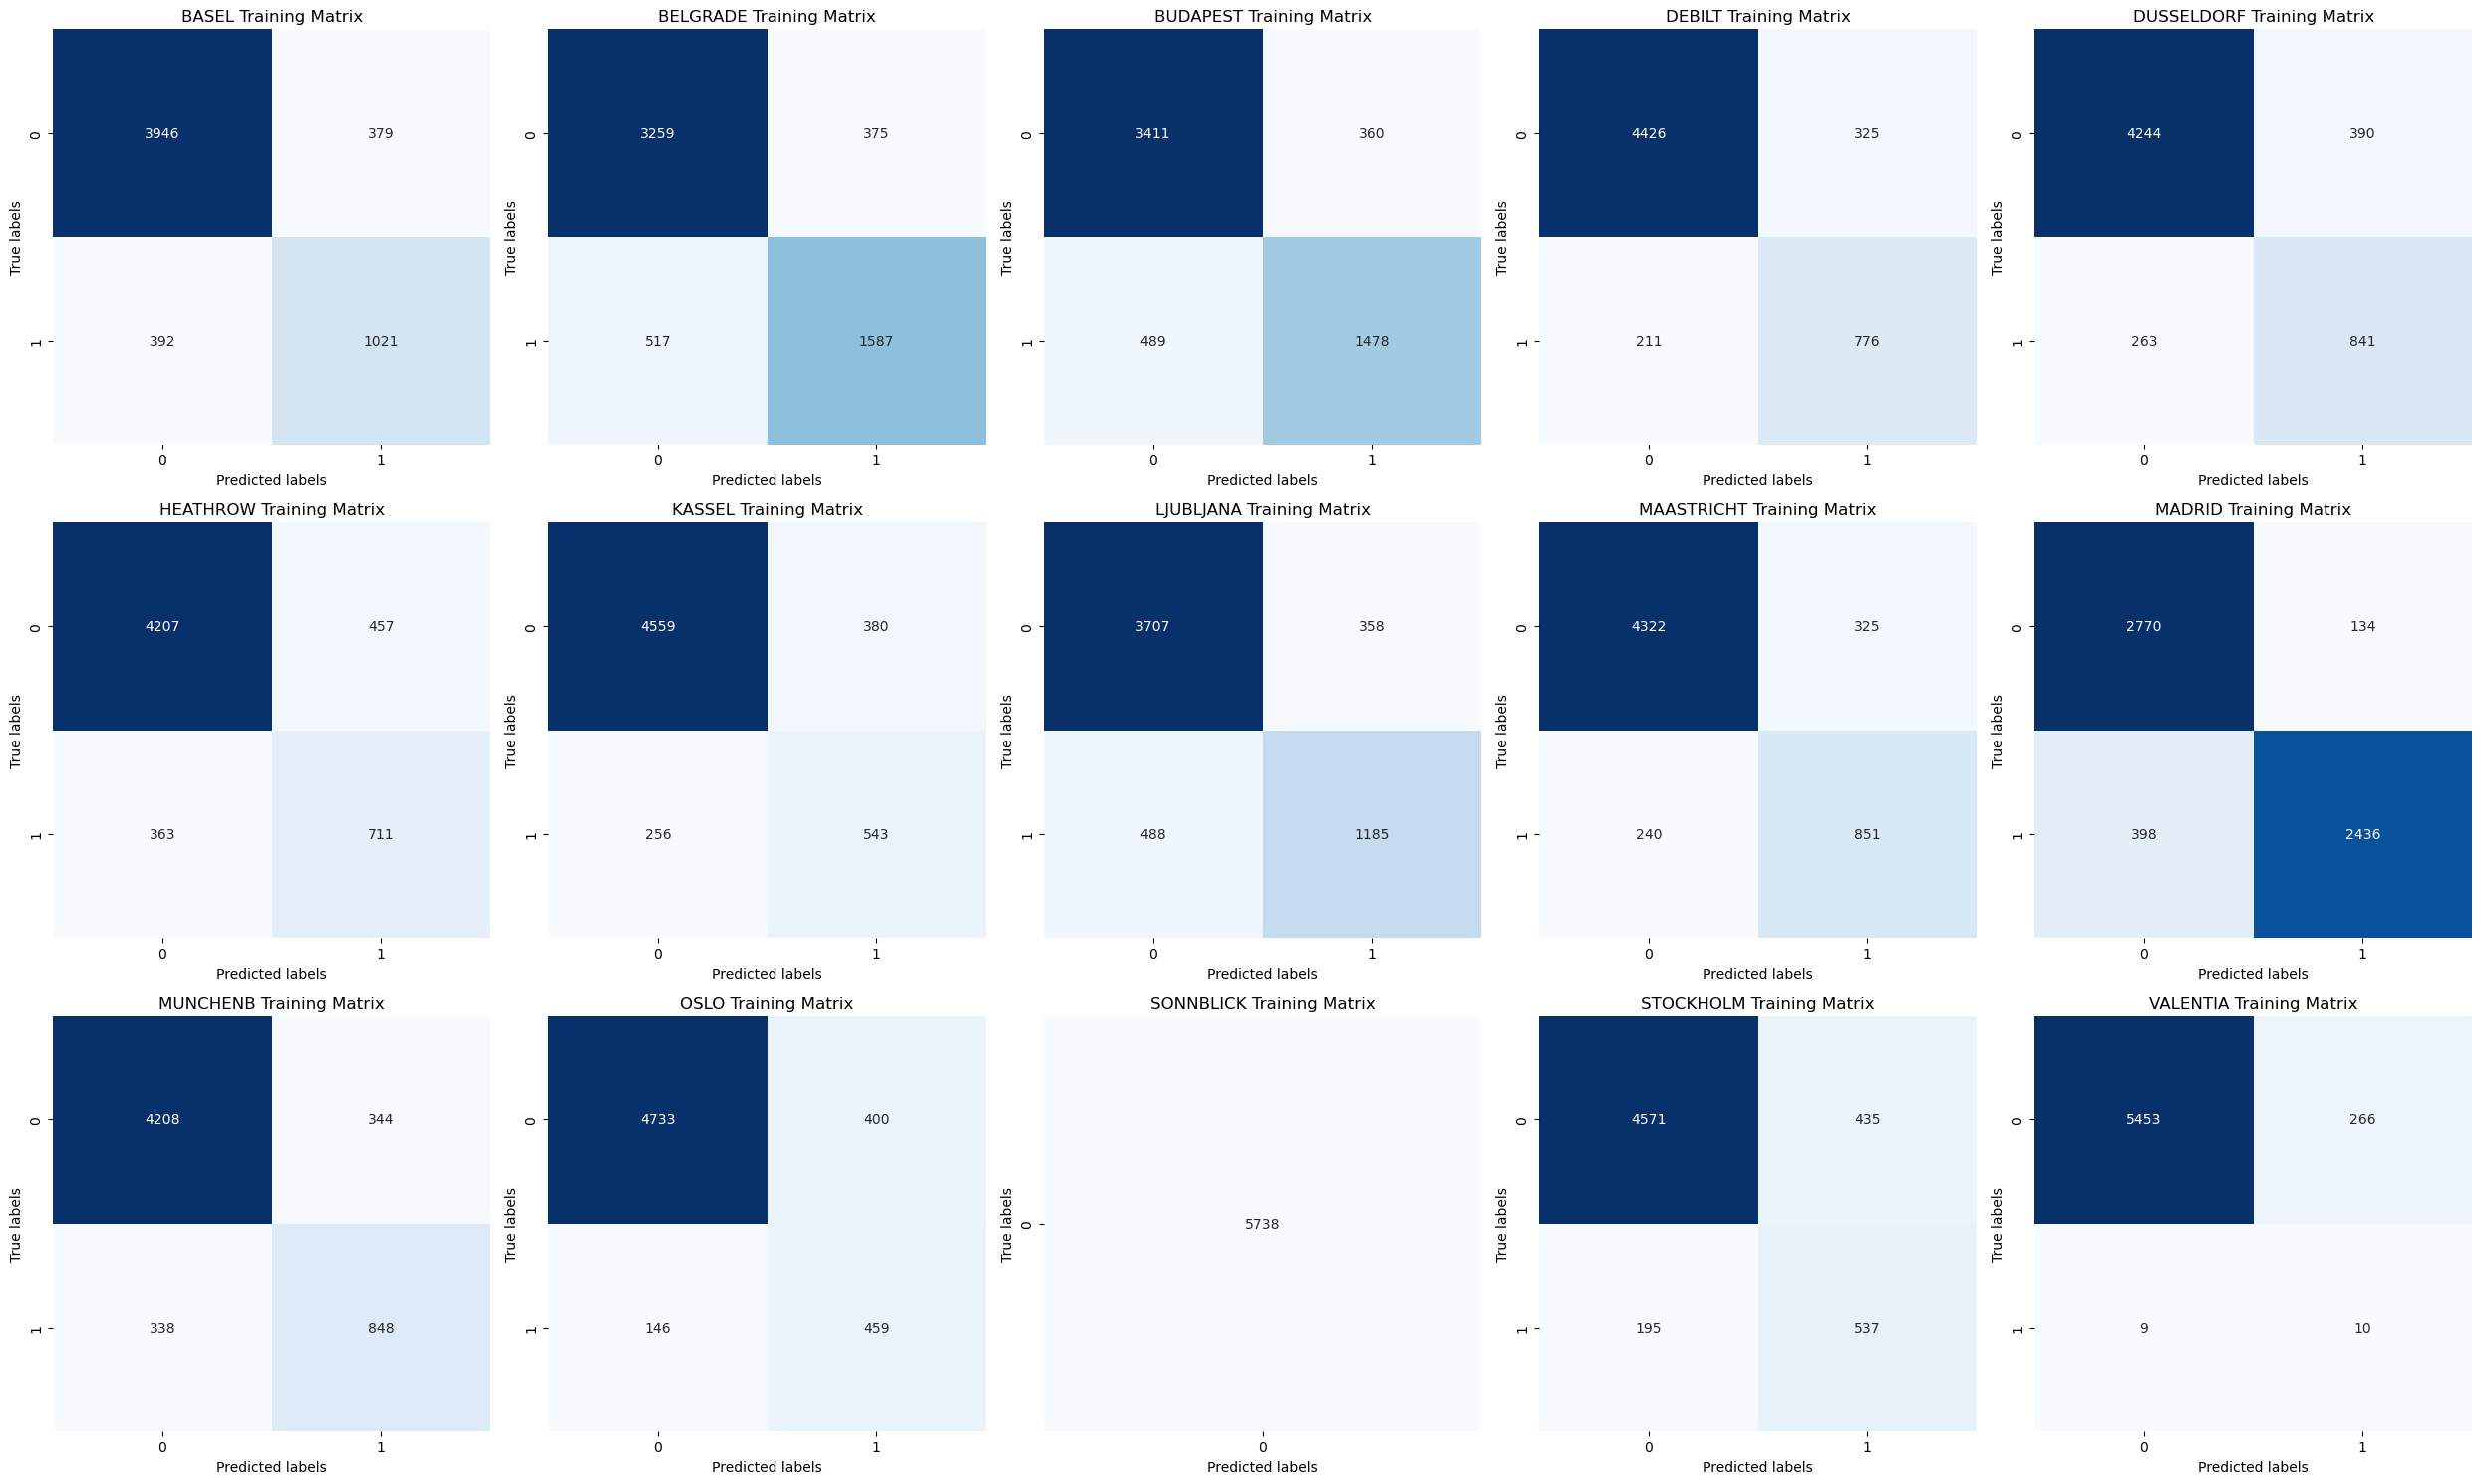

In [61]:
# Ensure y_train and y_pred are NumPy arrays
y_pred_test = np.array(y_pred_test)
y_test = np.array(y_test)

# Loop through each station
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
count = 0

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):  
            break
        
        name = locations[count]
        
        # Corrected filtering of station-specific labels
        y_true = y_pred_test[:, count] if y_pred_test.ndim > 1 else y_pred_test  
        y_test_col = y_test[:, count] if y_test.ndim > 1 else y_test 

        # Get unique labels
        unique_labels = np.unique(y_true)
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute and plot confusion matrix
        cm = confusion_matrix(y_true, y_test_col, labels=valid_labels if valid_labels else None)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues", cbar=False)  

        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Training Matrix')

        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

plt.tight_layout()
plt.show()

### Second Run

In [63]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(200,150,100,100), max_iter=1500, tol=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 150, 100, 100), max_iter=1500, tol=0.001)

In [64]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8581803392981641
0.48518647612408505


### Multi-Staion Matrix Training Set

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


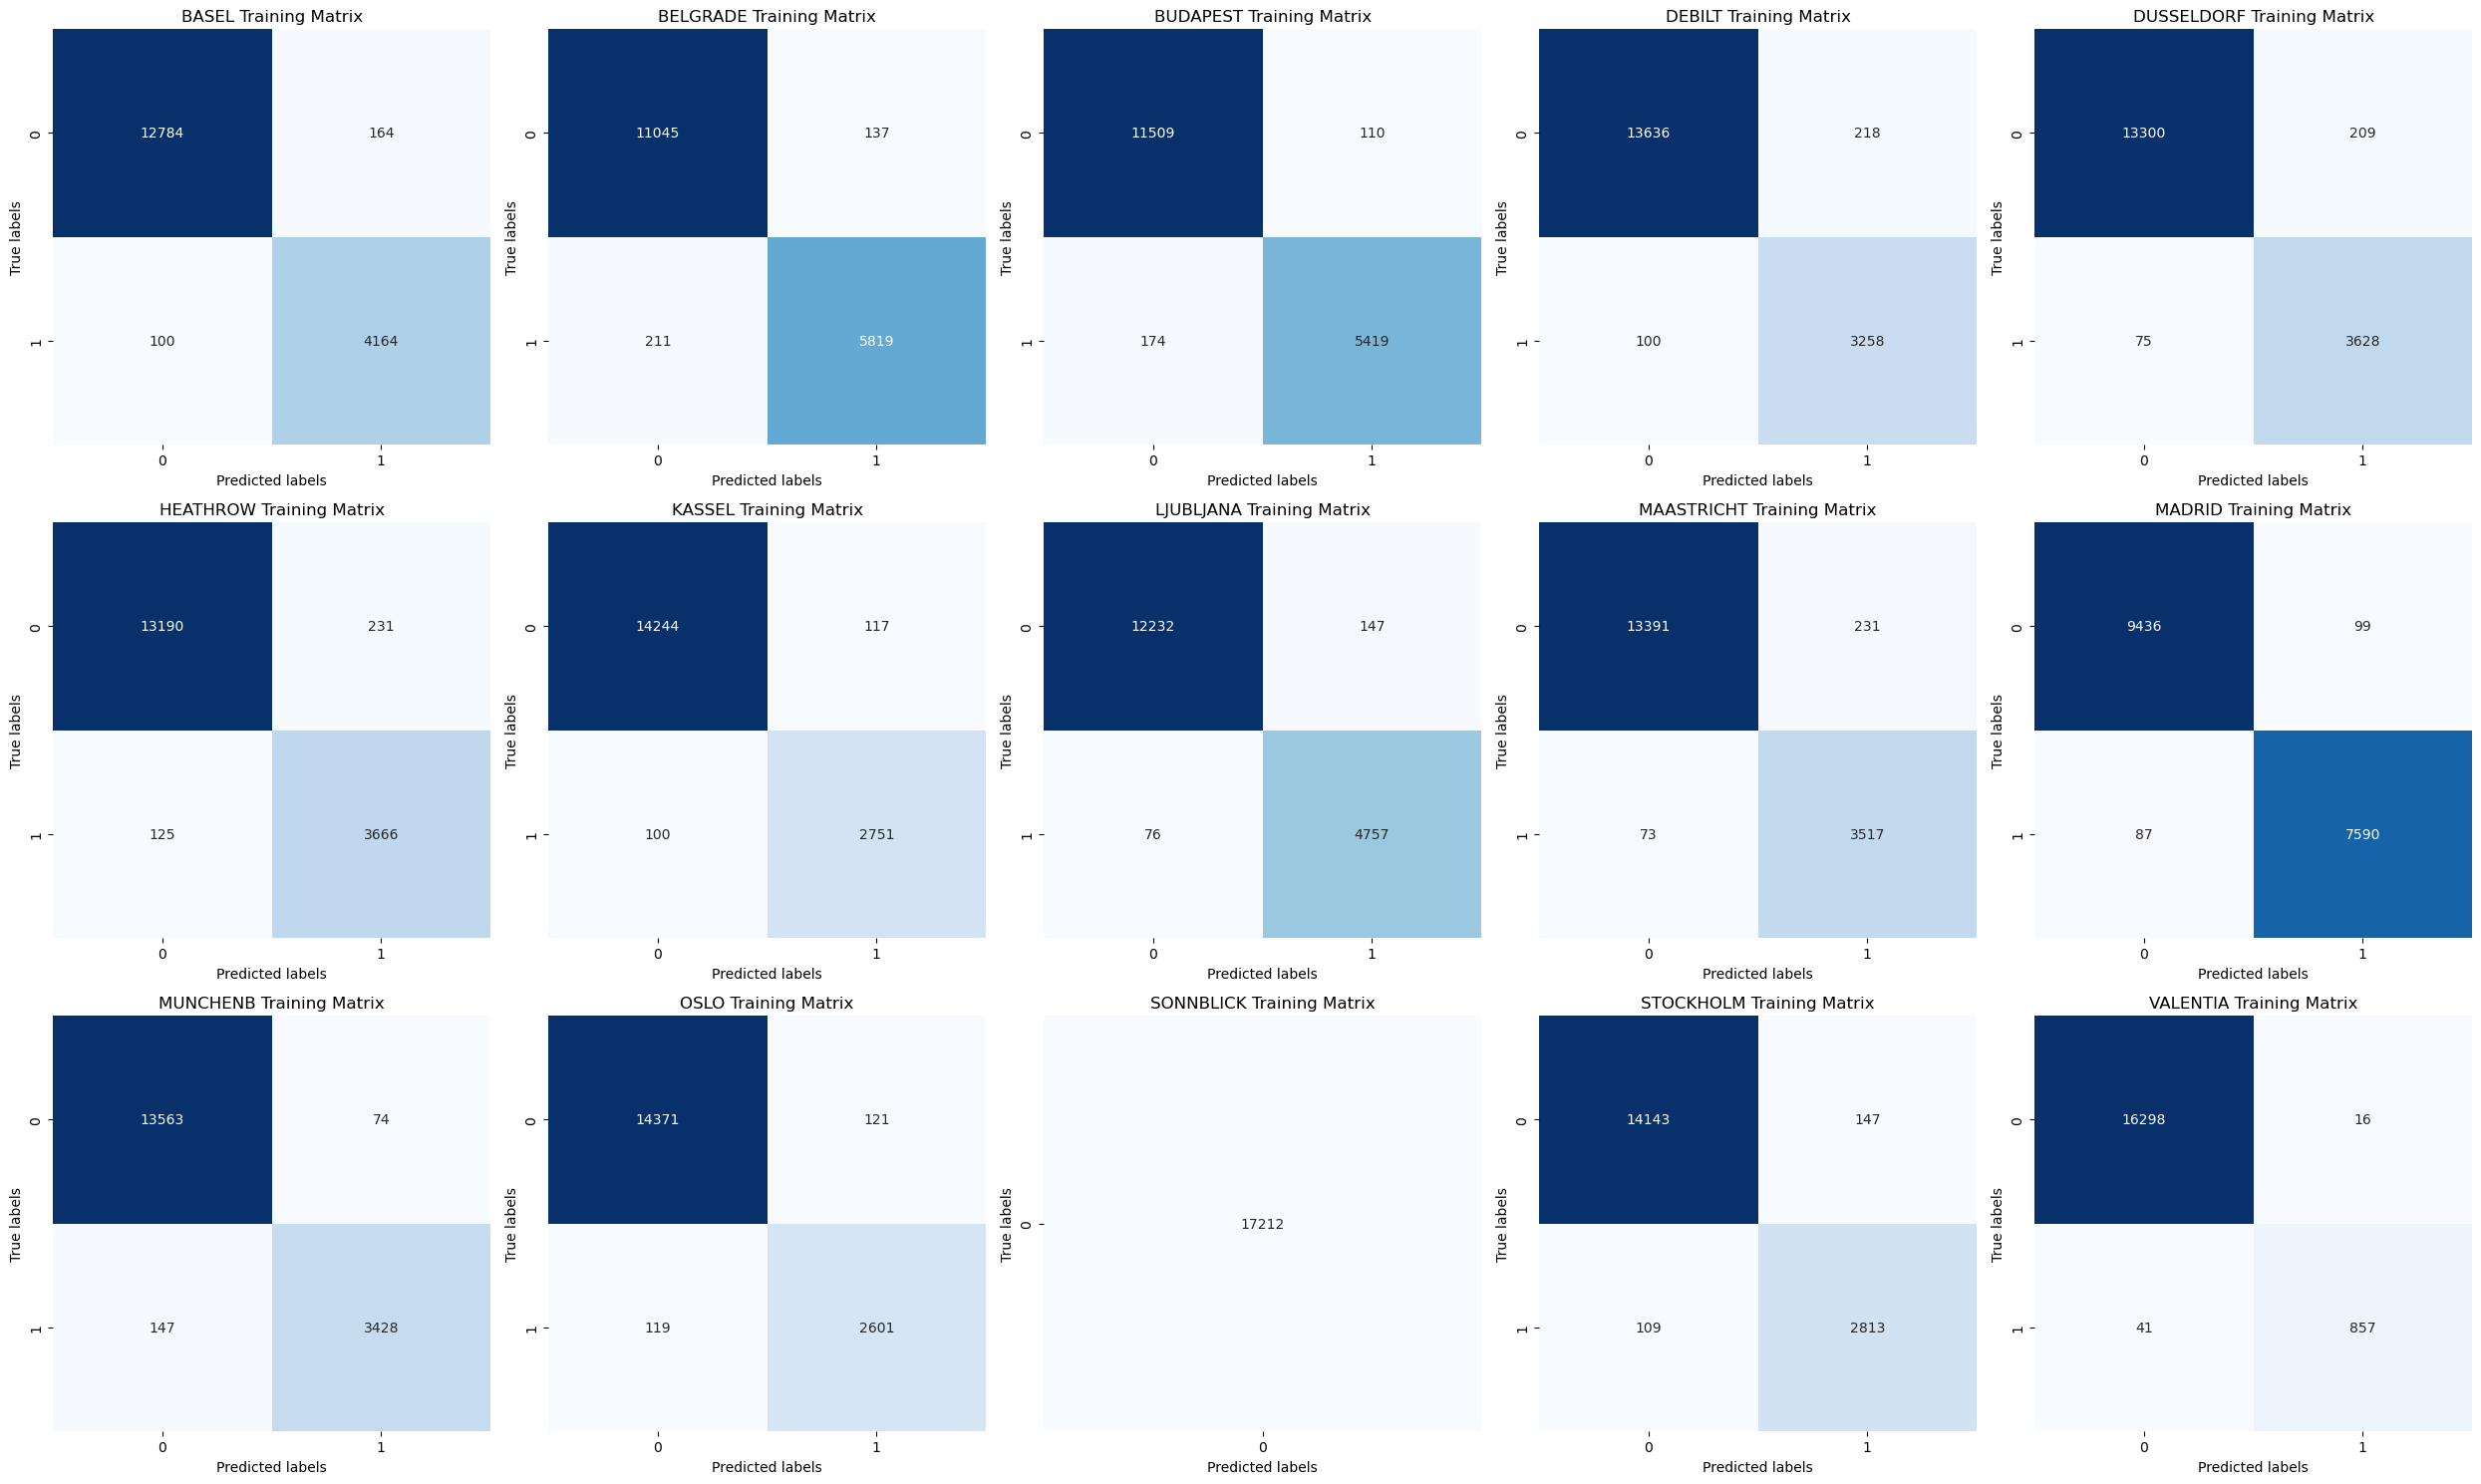

In [66]:
# Ensure y_train and y_pred are NumPy arrays
y_train = np.array(y_train)
y_pred = np.array(y_pred)

# Loop through each station
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
count = 0

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):  
            break
        
        name = locations[count]
        
        # Corrected filtering of station-specific labels
        y_true = y_train[:, count] if y_train.ndim > 1 else y_train  
        y_pred_col = y_pred[:, count] if y_pred.ndim > 1 else y_pred  

        # Get unique labels
        unique_labels = np.unique(y_true)
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute and plot confusion matrix
        cm = confusion_matrix(y_true, y_pred_col, labels=valid_labels if valid_labels else None)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues", cbar=False)  

        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Training Matrix')

        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

plt.tight_layout()
plt.show()

### Multi-Staion Matrix Test Set

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


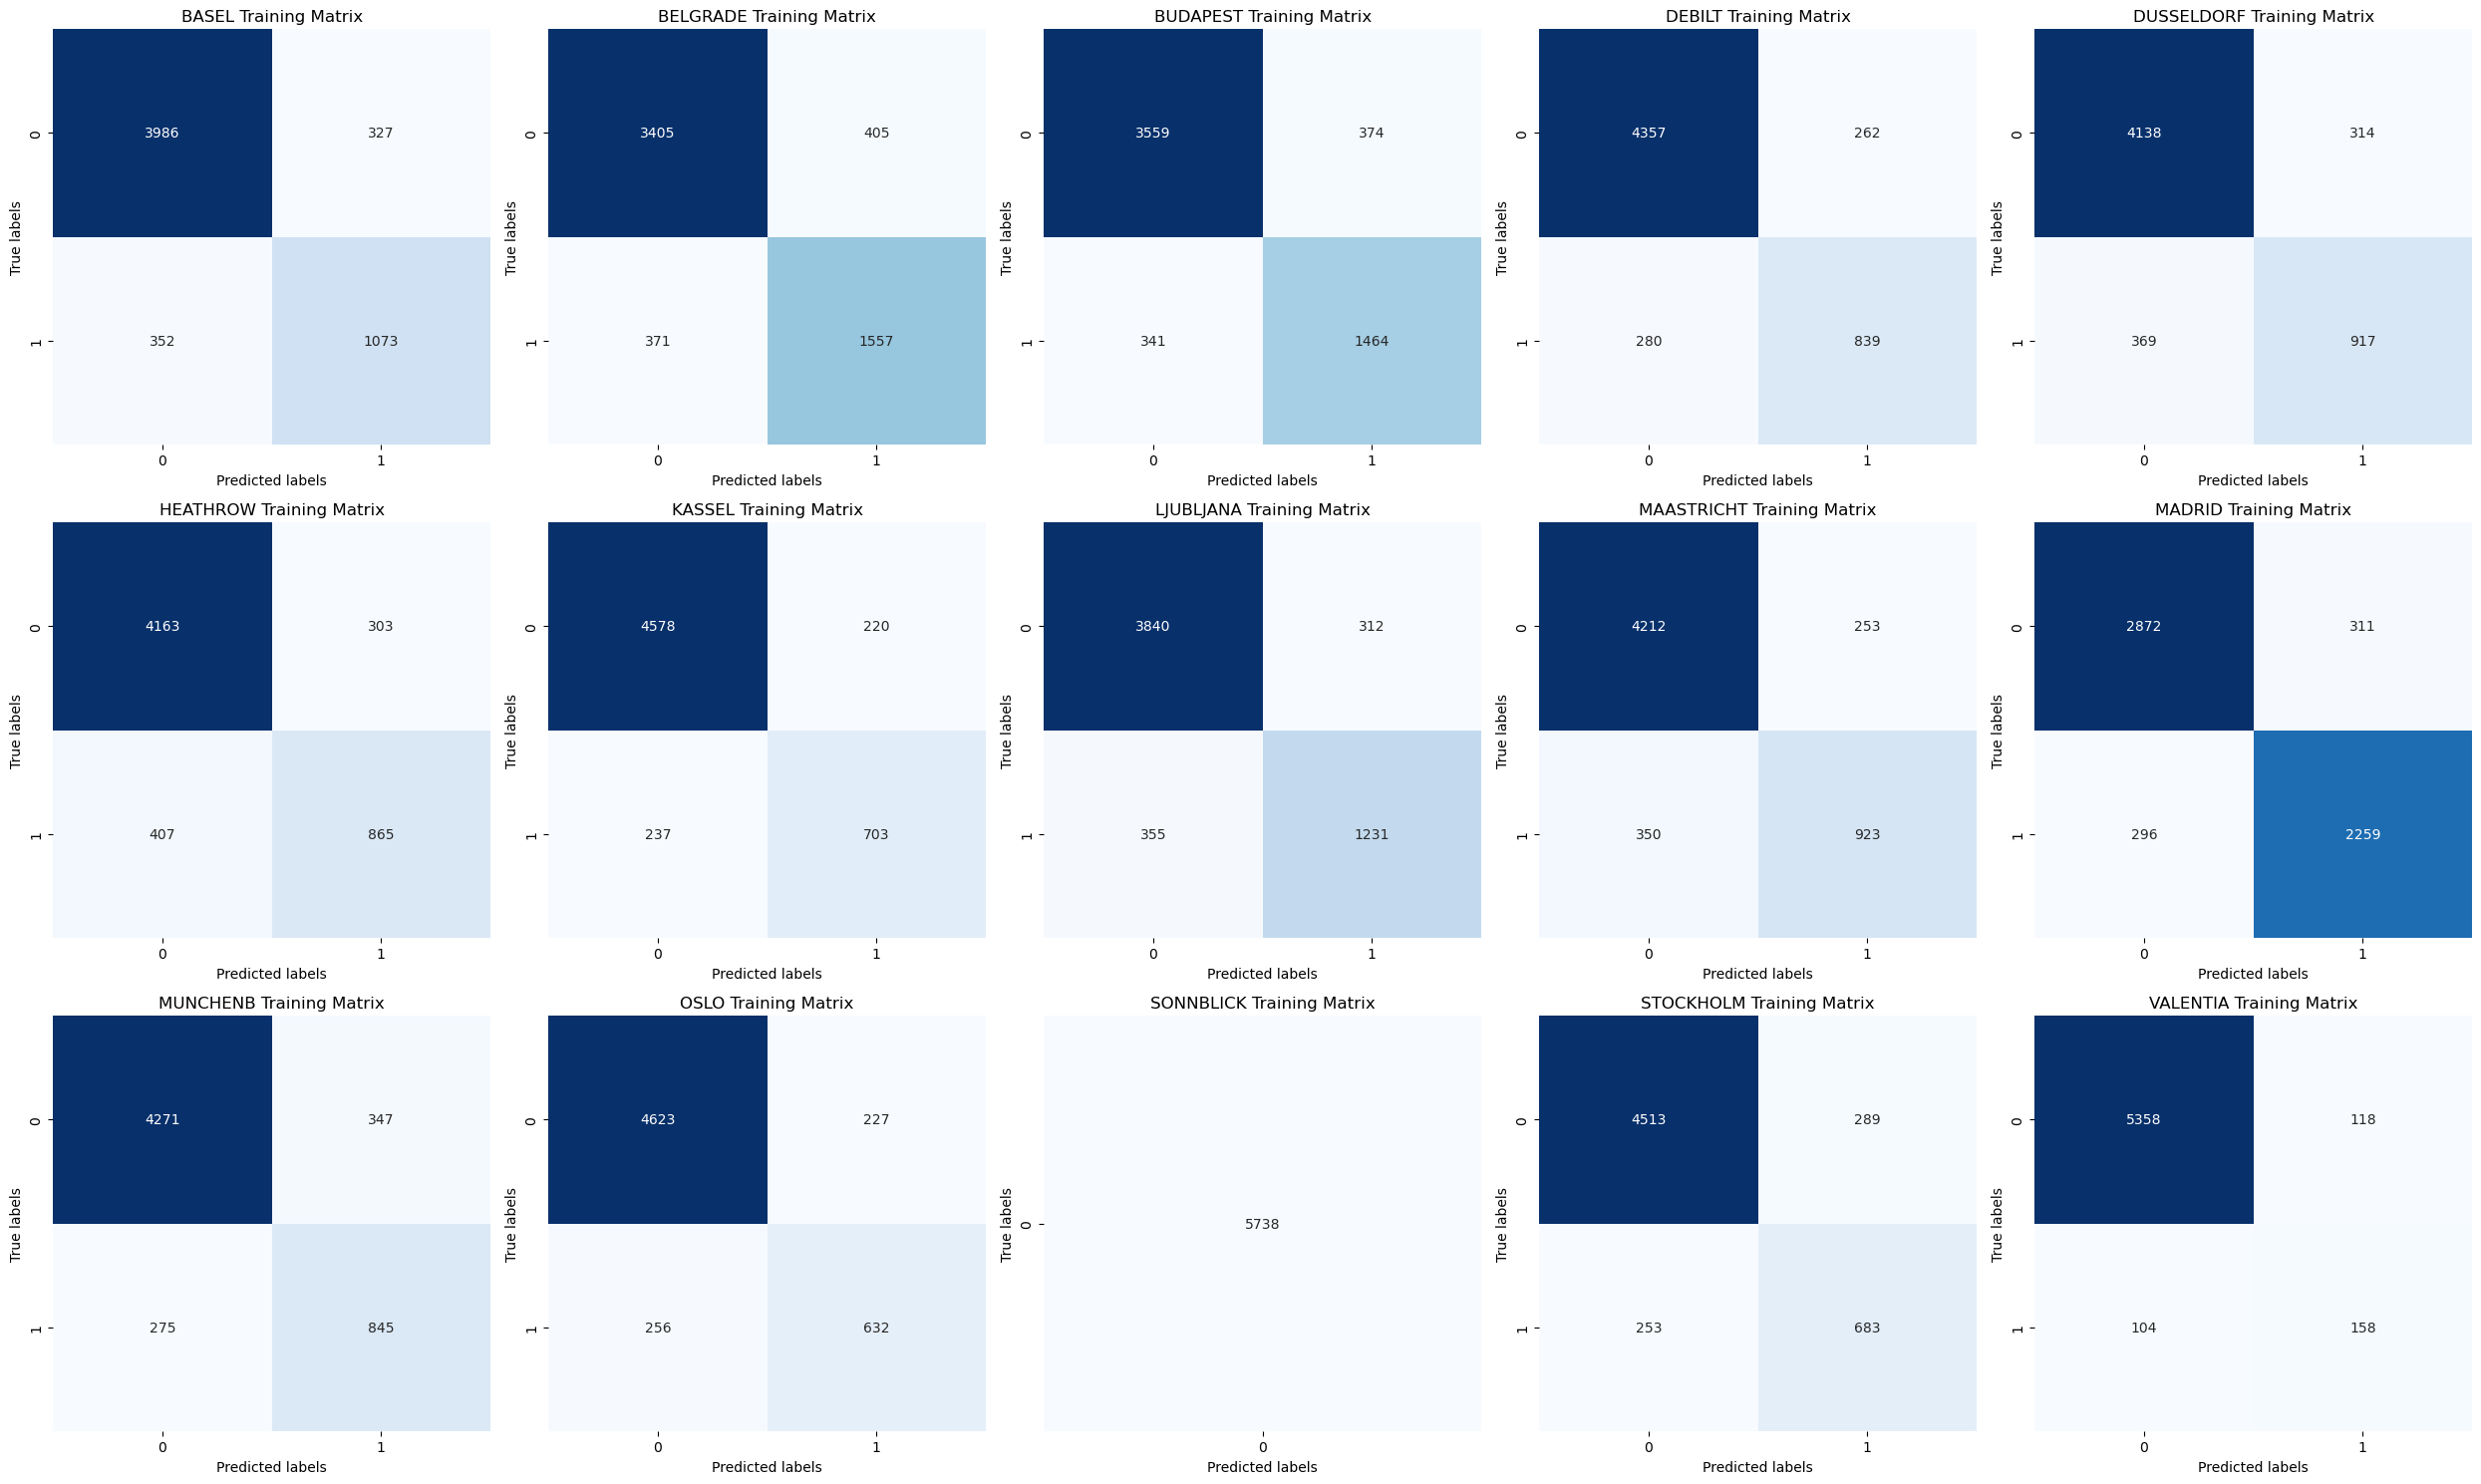

In [68]:
# Ensure y_train and y_pred are NumPy arrays
y_pred_test = np.array(y_pred_test)
y_test = np.array(y_test)

# Loop through each station
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
count = 0

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):  
            break
        
        name = locations[count]
        
        # Corrected filtering of station-specific labels
        y_true = y_pred_test[:, count] if y_pred_test.ndim > 1 else y_pred_test  
        y_test_col = y_test[:, count] if y_test.ndim > 1 else y_test 

        # Get unique labels
        unique_labels = np.unique(y_true)
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute and plot confusion matrix
        cm = confusion_matrix(y_true, y_test_col, labels=valid_labels if valid_labels else None)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues", cbar=False)  

        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Training Matrix')

        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

plt.tight_layout()
plt.show()

### Final Run

In [70]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(200,150,100,100), max_iter=2000, tol=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 150, 100, 100), max_iter=2000, tol=0.001)

In [122]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8348245410178945
0.4750784245381666


### Multi-Staion Matrix Training Set

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


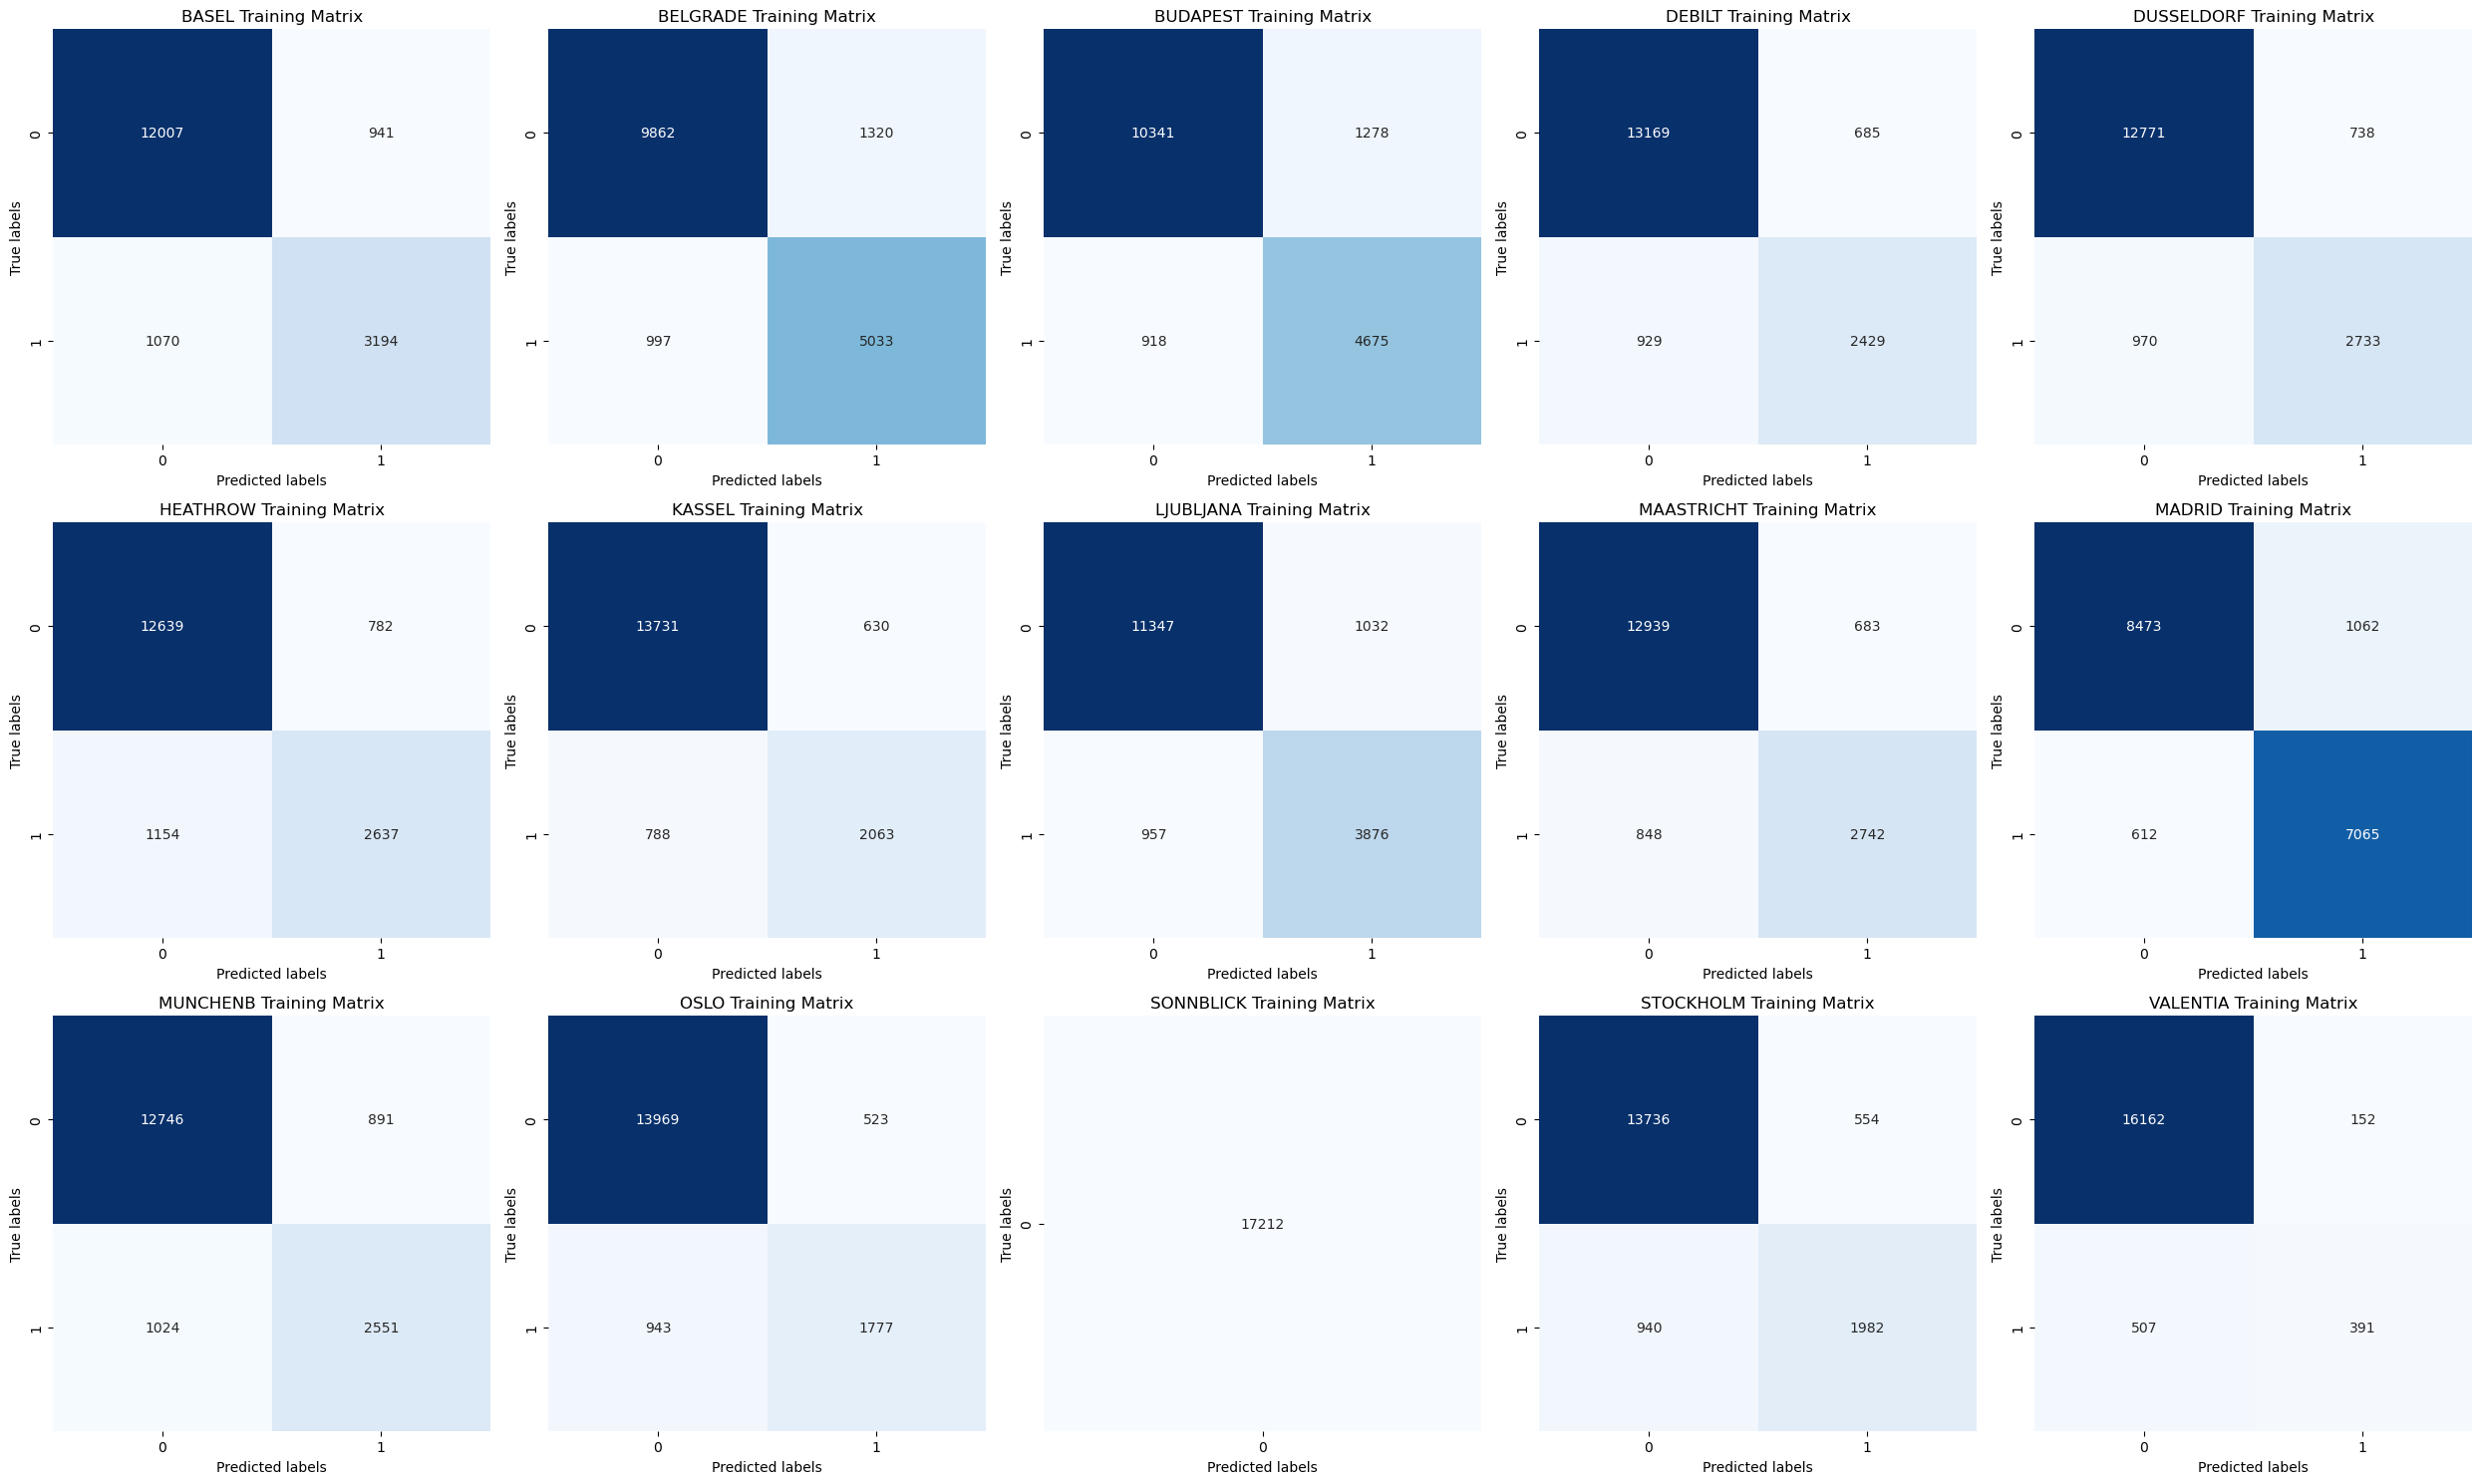

In [138]:
# Ensure y_train and y_pred are NumPy arrays
y_train = np.array(y_train)
y_pred = np.array(y_pred)

# Loop through each station
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
count = 0

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):  
            break
        
        name = locations[count]
        
        # Corrected filtering of station-specific labels
        y_true = y_train[:, count] if y_train.ndim > 1 else y_train  
        y_pred_col = y_pred[:, count] if y_pred.ndim > 1 else y_pred  

        # Get unique labels
        unique_labels = np.unique(y_true)
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute and plot confusion matrix
        cm = confusion_matrix(y_true, y_pred_col, labels=valid_labels if valid_labels else None)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues", cbar=False)  

        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Training Matrix')

        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

plt.tight_layout()
plt.show()

### Multi-Staion Matrix Test Set

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


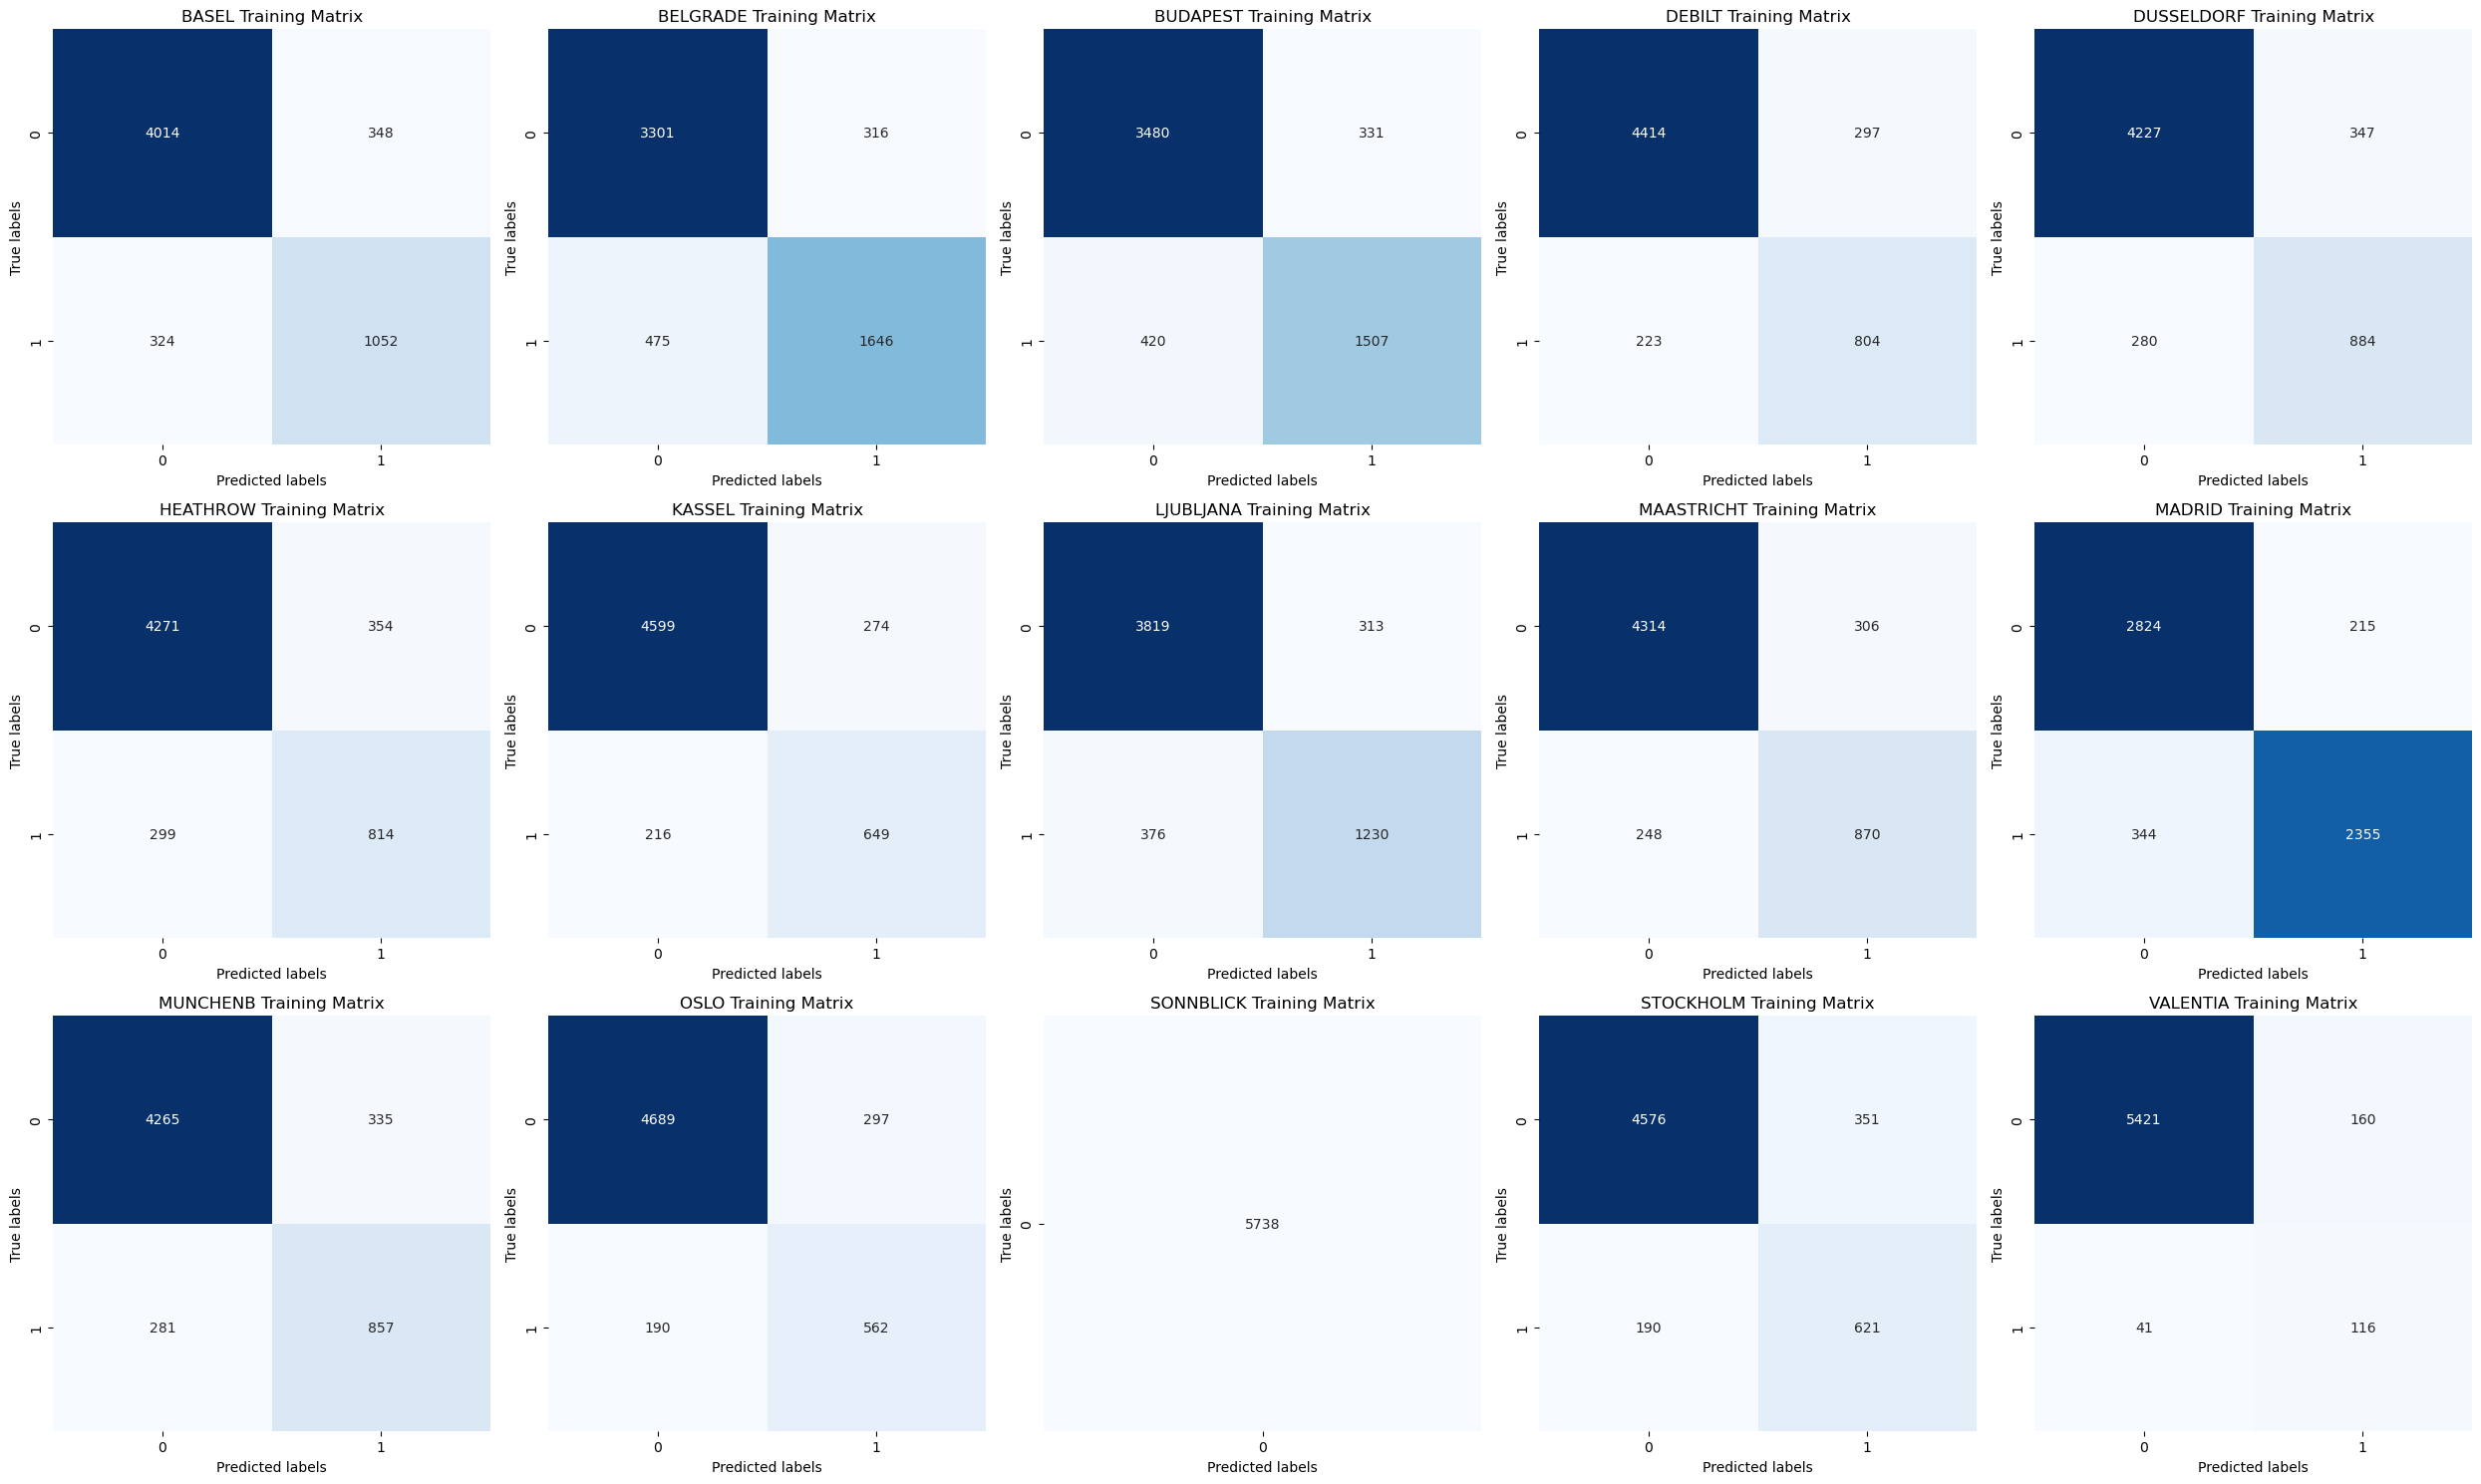

In [141]:
# Ensure y_train and y_pred are NumPy arrays
y_pred_test = np.array(y_pred_test)
y_test = np.array(y_test)

# Loop through each station
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
count = 0

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):  
            break
        
        name = locations[count]
        
        # Corrected filtering of station-specific labels
        y_true = y_pred_test[:, count] if y_pred_test.ndim > 1 else y_pred_test  
        y_test_col = y_test[:, count] if y_test.ndim > 1 else y_test 

        # Get unique labels
        unique_labels = np.unique(y_true)
        valid_labels = [label for label in labels if label in unique_labels]

        # Compute and plot confusion matrix
        cm = confusion_matrix(y_true, y_test_col, labels=valid_labels if valid_labels else None)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues", cbar=False)  

        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Training Matrix')

        if len(valid_labels) > 1:
            ax[i, j].xaxis.set_ticklabels(valid_labels)
            ax[i, j].yaxis.set_ticklabels(valid_labels)

        count += 1

plt.tight_layout()
plt.show()